In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
from datasets import load_dataset

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [4]:
df = dataset['train'].to_pandas()

In [6]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [47]:
df['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [66]:
df[(df['job_title_short']=='Data Analyst') & (df['salary_year_avg']>100_000)][['job_location','job_title','salary_year_avg']].iloc[0:100]

,job_location,job_title,salary_year_avg
410,"Atlantic Beach, FL",IT Business Lead Data Analyst - VP - Hybrid,133285.0
1555,"Aveiro, Portugal",Data Analyst/Engineer (M/F/D),111175.0
1681,"Irvine, CA",Data Analyst,111175.0
1684,"Tampa, FL",Data Analyst - Data17829,120000.0
1867,"Chicago, IL",Data Integration Analyst (West Coast/Chicago),101500.0
...,...,...,...
30808,"Rockville, MD",Food Security Survey Data Analyst,115000.0
31002,"New York, NY",Institutional Data/Reporting Analyst,115000.0
31148,"Bethesda, MD",Data Analyst SME,115000.0
31152,"Palo Alto, CA","Applied Scientist, Search",179000.0


In [74]:
#df[(df['job_title_short']=='Data Analyst') & (df['salary_year_avg']>100_000)]
df[(df['job_title_short']=='Data Analyst') & (df['salary_year_avg'].notna())][['job_location','job_title','salary_year_avg']][0:10]

,job_location,job_title,salary_year_avg
109,Anywhere,Senior Supply Chain Analytics Analyst,89000.00
180,"Dos Palos, CA",Data Analyst III,90250.00
410,"Atlantic Beach, FL",IT Business Lead Data Analyst - VP - Hybrid,133285.00
988,"Springfield, MA",DATA ANALYST (ONSITE),62623.00
1413,"Atlanta, GA",Junior BI Developer,71300.00
1490,Poland,HR Data Analyst,43200.00
1555,"Aveiro, Portugal",Data Analyst/Engineer (M/F/D),111175.00
1587,"Long Beach, CA",Sr Data Analyst,89111.75
1681,"Irvine, CA",Data Analyst,111175.00
1684,"Tampa, FL",Data Analyst - Data17829,120000.00


In [7]:
df['job_posted_month'] = df.job_posted_date.dt.month

In [9]:
df.drop(labels='job_posted_month',axis=1,inplace=True)

In [8]:
df.sort_values(by='job_posted_date', inplace=True)

In [56]:
df.drop(labels='salary_hour_avg',axis=1,inplace=True)

In [61]:
df.dropna(axis=0, how='any', subset=['salary_year_avg'],inplace=True)

In [11]:
df.describe()


,job_posted_date,salary_year_avg,salary_hour_avg
count,785741,22003.000000,10662.000000
mean,2023-06-25 16:02:11.860247552,123286.274072,47.016598
min,2023-01-01 00:00:04,15000.000000,8.000000
25%,2023-03-20 10:05:48,90000.000000,27.500000
50%,2023-06-29 06:11:38,115000.000000,45.980000
75%,2023-09-27 01:01:16,150000.000000,61.159996
max,2023-12-31 23:59:58,960000.000000,391.000000
std,NaN,48312.449482,21.890738


In [18]:
print(df.salary_year_avg.min(),df.salary_year_avg.max())
min_salary_ixd = df.salary_year_avg.idxmin()


15000.0 960000.0


In [17]:
df.iloc[min_salary_ixd]

,665729
job_title_short,Data Engineer
job_title,Data Engineer - Hadoop
job_location,Brazil
job_via,via LinkedIn
job_schedule_type,Full-time
job_work_from_home,False
search_location,Brazil
job_posted_date,2023-12-09 10:05:30
job_no_degree_mention,True
job_health_insurance,False


In [20]:
df['job_title_short'].value_counts()

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


In [33]:
dfs = df.groupby(by=['job_title_short','job_country'])["salary_year_avg"].median()


In [31]:
dfs[dfs.notna()]

job_title_short    job_country         
Business Analyst   Argentina                71100.0
                   Australia                70000.0
                   Bangladesh               16500.0
                   Belgium                  89100.0
                   Bulgaria                 71925.0
                                             ...   
Software Engineer  Ukraine                  54000.0
                   United Arab Emirates     79200.0
                   United Kingdom           89100.0
                   United States           130000.0
                   Vietnam                  53600.0
Name: salary_year_avg, Length: 598, dtype: float64


In [53]:
dfm = df.groupby(by='job_title_short')[['salary_year_avg']].agg(['min','mean','median','max'])

In [58]:
dfm.columns

Index([   ('salary_year_avg', 'min'),   ('salary_year_avg', 'mean'),
       ('salary_year_avg', 'median'),    ('salary_year_avg', 'max')],
      dtype='object')

In [55]:
dfm.columns = dfm.columns.to_flat_index()

In [56]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, Business Analyst to Software Engineer
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   (salary_year_avg, min)     10 non-null     float64
 1   (salary_year_avg, mean)    10 non-null     float64
 2   (salary_year_avg, median)  10 non-null     float64
 3   (salary_year_avg, max)     10 non-null     float64
dtypes: float64(4)
memory usage: 400.0+ bytes


In [49]:
dfm.columns=[f'{j}' if j != '' else f'{i}' for i,j in dfm.columns]


In [57]:
dfm

,"(salary_year_avg, min)","(salary_year_avg, mean)","(salary_year_avg, median)","(salary_year_avg, max)"
job_title_short,,,,
Business Analyst,16500.0,91082.612833,85000.0,387460.0
Cloud Engineer,42000.0,111268.453846,90000.0,280000.0
Data Analyst,25000.0,93841.907854,90000.0,650000.0
Data Engineer,15000.0,130125.604250,125000.0,525000.0
Data Scientist,27000.0,135988.837171,127500.0,960000.0
Machine Learning Engineer,30000.0,126774.315972,106415.0,325000.0
Senior Data Analyst,30000.0,113911.363665,111175.0,425000.0
Senior Data Engineer,35000.0,145840.611624,147500.0,425000.0
Senior Data Scientist,45000.0,154206.292996,155500.0,890000.0


In [61]:
df['job_country'].value_counts().head(20)

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


In [86]:
us_jobs = df[df['job_country'].isin(['USA','United States'])]

In [91]:
us_jobs = us_jobs[(us_jobs['salary_year_avg'].notna())]

In [93]:
us_jobs.groupby(by='job_title_short')[['salary_year_avg']].agg(['count','min','mean','median','max'])

salary_year_avg                                    \
                                    count      min           mean    median   
job_title_short                                                               
Business Analyst                      431  35000.0   96175.447397   90000.0   
Cloud Engineer                         20  42000.0  120090.900000  116100.0   
Data Analyst                         4350  25000.0   94553.964924   90000.0   
Data Engineer                        2915  23496.0  134226.676753  125000.0   
Data Scientist                       4553  30000.0  139946.707204  130000.0   
Machine Learning Engineer             128  44408.5  154240.382812  150000.0   
Senior Data Analyst                   913  35360.0  115729.129954  110000.0   
Senior Data Engineer                 1058  45000.0  151448.023186  150000.0   
Senior Data Scientist                1241  55000.0  159330.432029  155000.0   
Software Engineer                     157  48982.0  137964.929588  130000.0   

                                     
                                max  
job_title_short                      
Business Analyst           387460.0  
Cloud Engineer             221844.0  
Data Analyst               375000.0  
Data Engineer              525000.0  
Data Scientist             960000.0  
Machine Learning Engineer  315000.0  
Senior Data Analyst        425000.0  
Senior Data Engineer       375000.0  
Senior Data Scientist      475000.0  
Software Engineer          375000.0

In [106]:
us_jobs.groupby(by=['job_title_short'])[['salary_year_avg']].agg(['median','min','max','count']).sort_values(by=('salary_year_avg','median'))

salary_year_avg                         
                                   median      min       max count
job_title_short                                                   
Business Analyst                  90000.0  35000.0  387460.0   431
Data Analyst                      90000.0  25000.0  375000.0  4350
Senior Data Analyst              110000.0  35360.0  425000.0   913
Cloud Engineer                   116100.0  42000.0  221844.0    20
Data Engineer                    125000.0  23496.0  525000.0  2915
Data Scientist                   130000.0  30000.0  960000.0  4553
Software Engineer                130000.0  48982.0  375000.0   157
Machine Learning Engineer        150000.0  44408.5  315000.0   128
Senior Data Engineer             150000.0  45000.0  375000.0  1058
Senior Data Scientist            155000.0  55000.0  475000.0  1241

In [108]:
us_jobs.groupby(by=['job_title_short'])['salary_year_avg'].agg(['median','min','max','count']).sort_values(by='median',ascending=False)

,median,min,max,count
job_title_short,,,,
Senior Data Scientist,155000.0,55000.0,475000.0,1241
Machine Learning Engineer,150000.0,44408.5,315000.0,128
Senior Data Engineer,150000.0,45000.0,375000.0,1058
Data Scientist,130000.0,30000.0,960000.0,4553
Software Engineer,130000.0,48982.0,375000.0,157
Data Engineer,125000.0,23496.0,525000.0,2915
Cloud Engineer,116100.0,42000.0,221844.0,20
Senior Data Analyst,110000.0,35360.0,425000.0,913
Business Analyst,90000.0,35000.0,387460.0,431


In [147]:
datetime_counts = df.job_posted_date.value_counts().sort_index()

In [149]:
import matplotlib.pyplot as plt

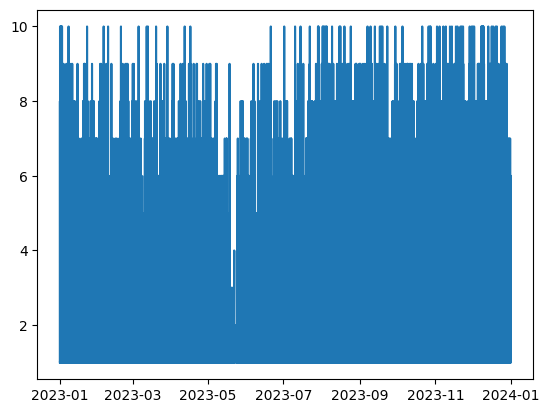

In [148]:
plt.plot(datetime_counts.index,datetime_counts)
plt.show()

In [144]:
date_counts = df.job_posted_date.groupby(by=df.job_posted_date.dt.date).count().sort_index()
#us_jobs.groupby(by=['job_title_short'])[['salary_year_avg']].min()

In [145]:
date_counts

,job_posted_date
job_posted_date,
2023-01-01,3603
2023-01-02,2772
2023-01-03,2565
2023-01-04,3937
2023-01-05,3297
...,...
2023-12-27,1834
2023-12-28,1767
2023-12-29,1107


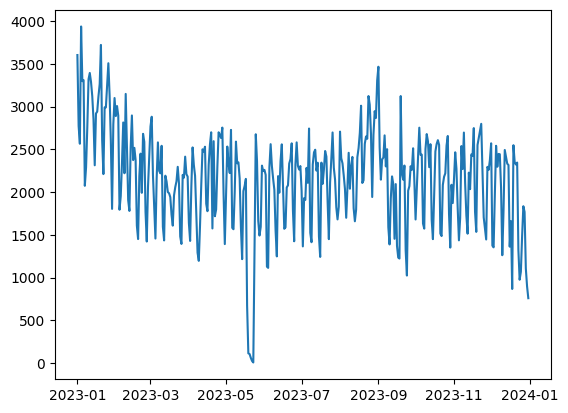

In [146]:
plt.plot(date_counts.index,date_counts)
plt.show()

In [172]:
month_counts = df.job_posted_date.groupby(by=df.job_posted_date.dt.month).count().sort_index()
month_counts

,job_posted_date
job_posted_date,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


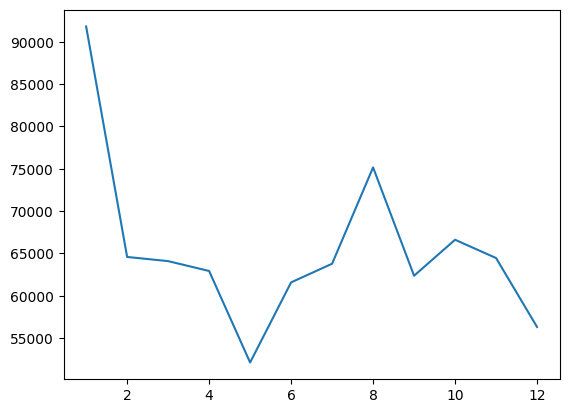

In [180]:
plt.plot(month_counts.index,month_counts.values)
plt.show()

In [175]:
df['job_posted_month'] = df.job_posted_date.dt.month

In [178]:
month_counts = df.groupby(by=df.job_posted_month)['job_posted_month'].count().sort_index()
month_counts

,job_posted_month
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


In [179]:
month_counts = df['job_posted_month'].value_counts().sort_index()
month_counts

,count
job_posted_month,
1,91822
2,64578
3,64084
4,62919
5,52104
6,61572
7,63777
8,75162
9,62359


In [184]:
s = pd.Series([10,20,30,40,50], index=['a','b','c','d','e'])

In [186]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [187]:
s.values

array([10, 20, 30, 40, 50])

In [189]:
job_counts = df.job_title_short.value_counts()

In [195]:
job_counts_asc=job_counts.sort_values(ascending=True)

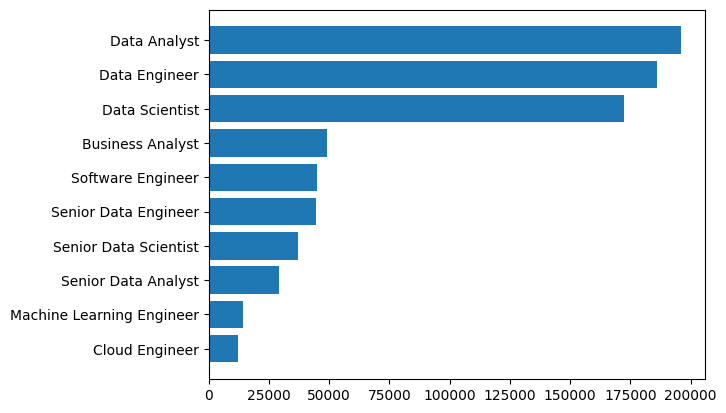

In [196]:
plt.barh(job_counts_asc.index,job_counts_asc)
plt.show()

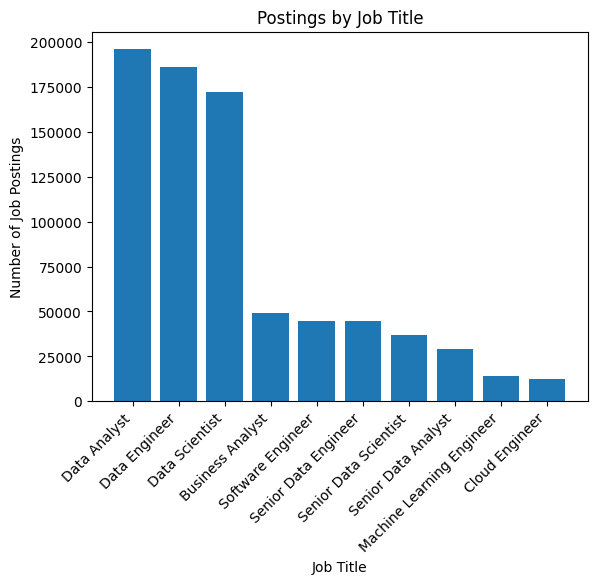

In [201]:
plt.bar(job_counts.index,job_counts.values)
plt.title("Postings by Job Title")
plt.ylabel("Number of Job Postings")
plt.xlabel("Job Title")
plt.xticks(rotation=45, ha="right")
plt.show()